# Data Analysis for Telia Stock Prices in 2018

In [1]:
student_name = 'Juha-Matti Hellsten'
student_id = 'AG7990'

### Data
Telia's stock prices from the year 2018, specifically time series data.

### Data and Preprocessing
* Read Telia's stock prices for 2018.
* Parse the `'Date'` column and set it as the index.
* Keep relevant columns: `'Date', 'Opening price', 'High price', 'Low price', 'Closing price', 'Total volume'`.

### Exploratory Data Analysis (EDA)
* Print the first ten days and sort data by `'Total volume'`.
* Create a new column `'High - Low'` representing price range.

### Data Visualization
* Plot `'Low price'` and `'High price'`.
* Visualize using _rolling window_ and _exponentially weighted moving_ (ewm) average.

### Outliers and Correlations
* Identify significant deviations using percentiles.
* Calculate _Pearson correlation coefficient_ and coefficient of determination (_R-squared_).

### Regression Model
* Build a linear regression model.
* Visualize the model using seaborn's `regplot`.
* Perform error checking.


## Data and Preprocessing
### Data
Let's perform the necessary preprocessing for the data.
The dataset consists of **Telia stock prices** from 2018, i.e., it is _Time Series data_.

In [2]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Preprocessing

Firstly, let's read the data as it is, which is not the correct solution for this assignment, but it gives us some information in the `DataFrame`.

In [3]:
url_src = r"C:\Users\jmhel\OneDrive\Työpöytä\JAMK\DA & Visualization\telia2018.csv"
df = pd.read_csv(url_src, sep=';', decimal=',')
df.head()

,Date,Bid,Ask,Opening price,High price,Low price,Closing price,Average price,Total volume,Turnover,Trades,Unnamed: 11
0,2018-12-28,4.078,4.083,4.000,4.117,3.995,4.076,4.083,988115,4034300.94,1075,NaN
1,2018-12-27,4.002,4.008,4.087,4.112,3.990,3.995,4.055,1195487,4848035.58,1377,NaN
2,2018-12-21,4.123,4.125,4.120,4.143,4.043,4.122,4.100,919570,3770429.07,1096,NaN
3,2018-12-20,4.169,4.174,4.151,4.186,4.119,4.163,4.162,941170,3917348.22,1036,NaN
4,2018-12-19,4.183,4.186,4.170,4.213,4.170,4.180,4.191,651864,2732150.44,698,NaN


## Read and sort data as a time series

Read the file, but set only a few columns of interest in the resulting `DataFrame`.
Set the `Date` column in the `DataFrame` as the `index`, so we get the `Date` as the `index` field.

Let's do the following tasks in this assignment:
* Parse the `Date` column into a date format.
* Set the `Date` column as the index in the DataFrame and remove the `Date` column from the DataFrame.
* The resulting `DataFrame` should have the following columns: `Date, Opening price, High price, Low price, Closing price, Total volume`, so remove other columns at this stage.

In [4]:
# TODO: Implement reading the file according to the following subtasks.
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df = df[['Opening price', 'High price', 'Low price', 'Closing price', 'Total volume']]

In [5]:
df.dtypes

Opening price    float64
High price       float64
Low price        float64
Closing price    float64
Total volume       int64
dtype: object

### Sorting the data
Let's do the following tasks in this assignment:
* Print the first ten days based on the `Date` value.
* Print the results sorted by the `Total volume` column.
* Create a new column `High - Low` that contains the difference between the highest and lowest prices.

In [6]:
# TODO: Print the first ten days based on the `Date` value
print("\nFirst ten days of data:")
print(df.head(10))


First ten days of data:
            Opening price  High price  Low price  Closing price  Total volume
Date                                                                         
2018-12-28          4.000       4.117      3.995          4.076        988115
2018-12-27          4.087       4.112      3.990          3.995       1195487
2018-12-21          4.120       4.143      4.043          4.122        919570
2018-12-20          4.151       4.186      4.119          4.163        941170
2018-12-19          4.170       4.213      4.170          4.180        651864
2018-12-18          4.240       4.268      4.166          4.171        964258
2018-12-17          4.229       4.270      4.225          4.241        807813
2018-12-14          4.142       4.240      4.142          4.226        917571
2018-12-13          4.164       4.204      4.153          4.153       1134391
2018-12-12          4.133       4.161      4.110          4.159       1039813


In [7]:
# TODO: Print the results sorted by the `Total volume` column (largest value first).
print("\nData sorted by Total volume (largest first):")
print(df.sort_values(by='Total volume', ascending=False).head(10))


Data sorted by Total volume (largest first):
            Opening price  High price  Low price  Closing price  Total volume
Date                                                                         
2018-04-20          3.850       4.020      3.850          3.988       9704458
2018-02-08          3.801       3.801      3.662          3.672       7977900
2018-04-23          3.997       4.123      3.983          4.105       7701410
2018-02-12          3.690       3.779      3.573          3.760       6642300
2018-10-19          3.988       3.988      3.766          3.901       5104780
2018-01-26          3.880       3.958      3.832          3.949       4987597
2018-02-06          3.769       3.828      3.754          3.761       4683421
2018-10-01          3.961       3.968      3.888          3.890       4230211
2018-07-20          3.840       3.885      3.693          3.768       4204622
2018-04-11          3.710       3.719      3.648          3.651       4191830


In [8]:
# TODO: Create a new column `High - Low` and print the DataFrame.
df['High - Low'] = df['High price'] - df['Low price']
print("\nDataFrame with new High - Low column:")
print(df.head())


DataFrame with new High - Low column:
            Opening price  High price  Low price  Closing price  Total volume  \
Date                                                                            
2018-12-28          4.000       4.117      3.995          4.076        988115   
2018-12-27          4.087       4.112      3.990          3.995       1195487   
2018-12-21          4.120       4.143      4.043          4.122        919570   
2018-12-20          4.151       4.186      4.119          4.163        941170   
2018-12-19          4.170       4.213      4.170          4.180        651864   

            High - Low  
Date                    
2018-12-28       0.122  
2018-12-27       0.122  
2018-12-21       0.100  
2018-12-20       0.067  
2018-12-19       0.043  


## Data Visualization
Let's implement the following tasks in this assignment:
* Visualize time series data in your preferred way.
* Choose at least **two different** (or even more) figure types.
* Visualize the data using the `'Low price'` and `'High price'` columns.
* Visualize using, for example, the `rolling` operator, which gives an evenly weighted series.
* Visualize giving *more weight* to the most recent observations (using the `ewm` - exponentially weighted moving - operator). Such a series adapts more quickly to changes than a series with evenly weighted by `rolling` operator.

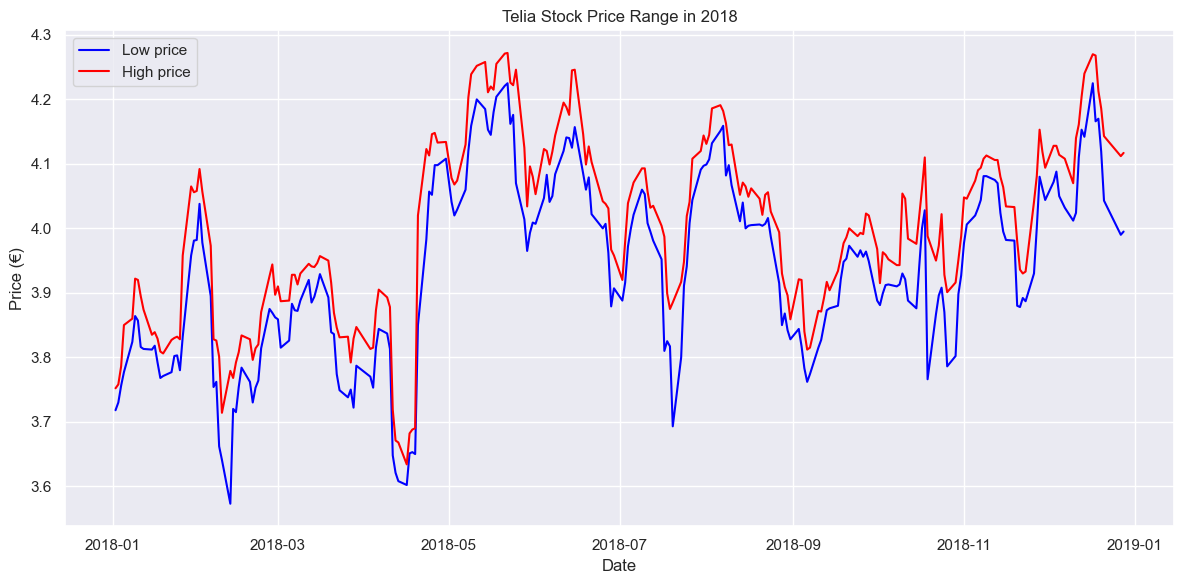

In [9]:
# TODO: Visualize the data using the 'Low price' and 'High price' columns
# Set the style for the plots

sns.set(style="darkgrid")

# Visualize the 'Low price' and 'High price' columns as line plots
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Low price'], label='Low price', color='blue')
plt.plot(df.index, df['High price'], label='High price', color='red')
plt.title('Telia Stock Price Range in 2018')
plt.xlabel('Date')
plt.ylabel('Price (€)')
plt.legend()
plt.tight_layout()
plt.show()

A figure with a Rolling window of `n` days.

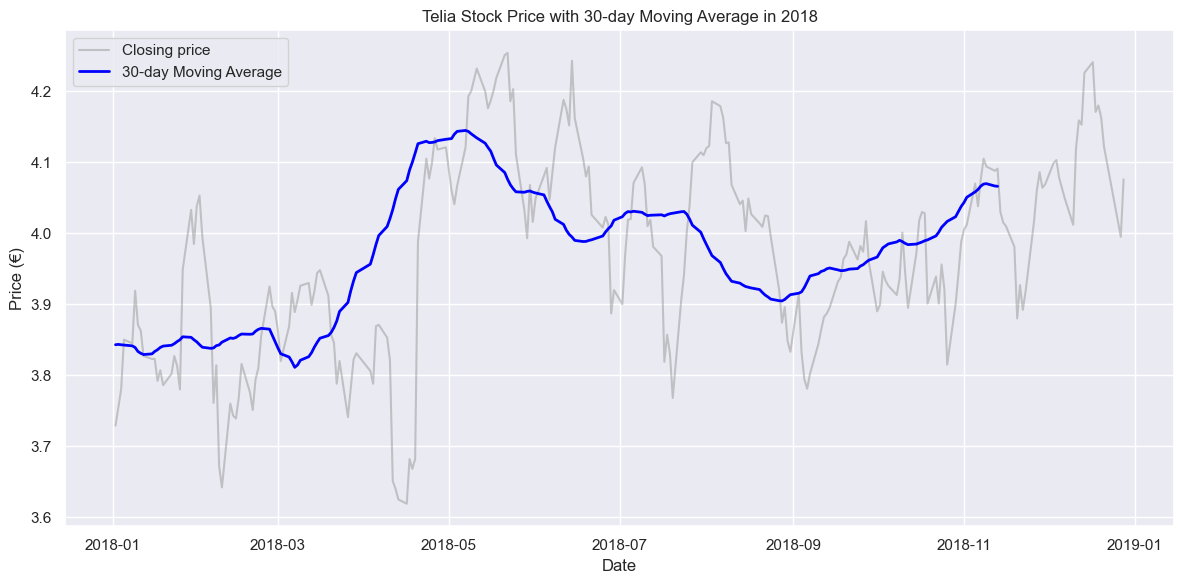

In [10]:
# TODO: Use the Rolling Window operator in visualization
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Closing price'], label='Closing price', alpha=0.4, color='gray')
plt.plot(df.index, df['Closing price'].rolling(window=30).mean(), 
         label='30-day Moving Average', color='blue', linewidth=2)
plt.title('Telia Stock Price with 30-day Moving Average in 2018')
plt.xlabel('Date')
plt.ylabel('Price (€)')
plt.legend()
plt.tight_layout()
plt.show()

### Weighting Recent Observations
Often, methods are used where *more weight* is given to recent observations.
Such a series adapts more quickly to changes than a series with evenly weighted by the `rolling` operator.

The `ewm` (*exponentially weighted moving*) operator provides such a series, where the `span` parameter determines the window size.

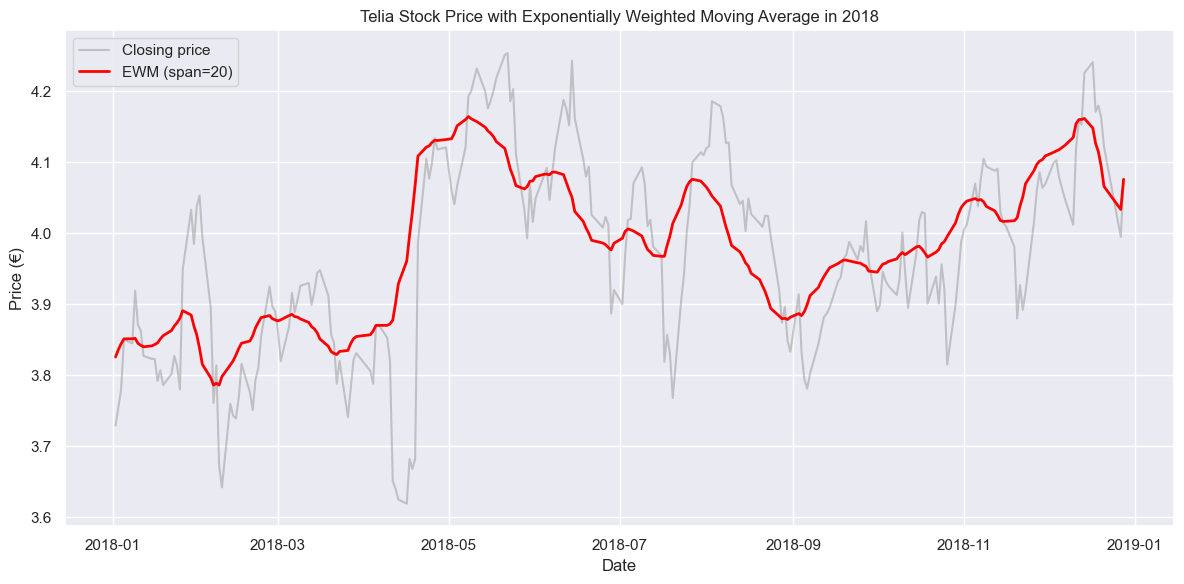

In [11]:
# TODO: Use the ewm operator in visualization
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Closing price'], label='Closing price', alpha=0.4, color='gray')
plt.plot(df.index, df['Closing price'].ewm(span=20).mean(), 
         label='EWM (span=20)', color='red', linewidth=2)
plt.title('Telia Stock Price with Exponentially Weighted Moving Average in 2018')
plt.xlabel('Date')
plt.ylabel('Price (€)')
plt.legend()
plt.tight_layout()
plt.show()

## Outliers and Correlations

Let's do the following tasks in this assignment:

* Check for *significant deviations* in each numerical column in the data. Significantly deviating values can be replaced if needed.
* Use the `2%` and `98%` percentiles of the data to identify significant deviations.
* Also, calculate the **Pearson correlation coefficient** and **coefficient of determination (R-squared)**.

In [12]:
# TODO: Calculate deviations (2% - 98%)
quantiles = df.quantile([0.02, 0.98])
print("2% and 98% percentiles for each column:")
print(quantiles)

2% and 98% percentiles for each column:
      Opening price  High price  Low price  Closing price  Total volume  \
0.02        3.66990     3.68996    3.64786        3.66766     436855.86   
0.98        4.22606     4.25506    4.18530        4.22612    4989940.66   

      High - Low  
0.02     0.02598  
0.98     0.17012  


Let's calculate:
* **Pearson correlation coefficient**
* **Coefficient of determination**
The goal is to identify _significant correlations_ between different columns of the data.

### Dependency between two variables

The dependency between two quantitative variables is examined using a **scatter plot** and the **correlation coefficient**.

### Scatter Plot

The **scatter plot** provides a quick view of the distribution of values for two variables.
* Usually interested in whether large values of `x` are associated with large or small values of `y`.
Whether there is a correlation, or if `y` values are random, indicating no significant correlation.

In [13]:
# TODO: Calculate the correlation of Opening price to Closing price
corr_open_close = df['Opening price'].corr(df['Closing price'])
print(f"\nCorrelation between Opening price and Closing price: {corr_open_close:.4f}")


Correlation between Opening price and Closing price: 0.9521


In [14]:
# TODO: Calculate the correlation of Opening price to other columns
print("Correlation of 'Opening price' to other columns:")
for column in df.columns:
    if column != 'Opening price':
        correlation = df['Opening price'].corr(df[column])
        print(f"Correlation with {column}: {correlation:.4f}")
        

Correlation of 'Opening price' to other columns:
Correlation with High price: 0.9766
Correlation with Low price: 0.9746
Correlation with Closing price: 0.9521
Correlation with Total volume: -0.3659
Correlation with High - Low: -0.0226


### Correlations
Correlations between all columns.

In [15]:
# TODO: Calculate correlations between all columns
correlation_matrix = df.corr(method='pearson')
print("\nPearson Correlation Matrix:")
print(correlation_matrix)


Pearson Correlation Matrix:
               Opening price  High price  Low price  Closing price  \
Opening price       1.000000    0.976568   0.974634       0.952074   
High price          0.976568    1.000000   0.973954       0.980769   
Low price           0.974634    0.973954   1.000000       0.980286   
Closing price       0.952074    0.980769   0.980286       1.000000   
Total volume       -0.365903   -0.309471  -0.427995      -0.363885   
High - Low         -0.022609    0.082619  -0.145506      -0.029121   

               Total volume  High - Low  
Opening price     -0.365903   -0.022609  
High price        -0.309471    0.082619  
Low price         -0.427995   -0.145506  
Closing price     -0.363885   -0.029121  
Total volume       1.000000    0.530784  
High - Low         0.530784    1.000000  


_Coefficient of determination_, often denoted as **R^2** (pronounced _R-squared_), is a statistical measure that represents
the proportion of the variance in the dependent variable that is predictable from the independent variables.

In [16]:
# TODO: Calculate the Coefficient of determination
corr_open_close = df['Opening price'].corr(df['Closing price'])
r_squared_open_close = corr_open_close ** 2
print(f"Coefficient of determination (R²) between Opening price and Closing price: {r_squared_open_close:.4f}")

Coefficient of determination (R²) between Opening price and Closing price: 0.9064


`HeatMap` is a 2-dimensional matrix plot that gives visualization of numerical values in the form of cells.
* The colors in the `HeatMap` chart represent the relationship of the values with the `DataFrame`, making it easy to spot patterns in the data.
* Heatmaps are particularly useful for visualizing the magnitude of a phenomenon in two dimensions.


Coefficient of determination (R²) matrix:
               Opening price  High price  Low price  Closing price  \
Opening price       1.000000    0.953685   0.949911       0.906445   
High price          0.953685    1.000000   0.948585       0.961909   
Low price           0.949911    0.948585   1.000000       0.960961   
Closing price       0.906445    0.961909   0.960961       1.000000   
Total volume        0.133885    0.095772   0.183179       0.132413   
High - Low          0.000511    0.006826   0.021172       0.000848   

               Total volume  High - Low  
Opening price      0.133885    0.000511  
High price         0.095772    0.006826  
Low price          0.183179    0.021172  
Closing price      0.132413    0.000848  
Total volume       1.000000    0.281732  
High - Low         0.281732    1.000000  


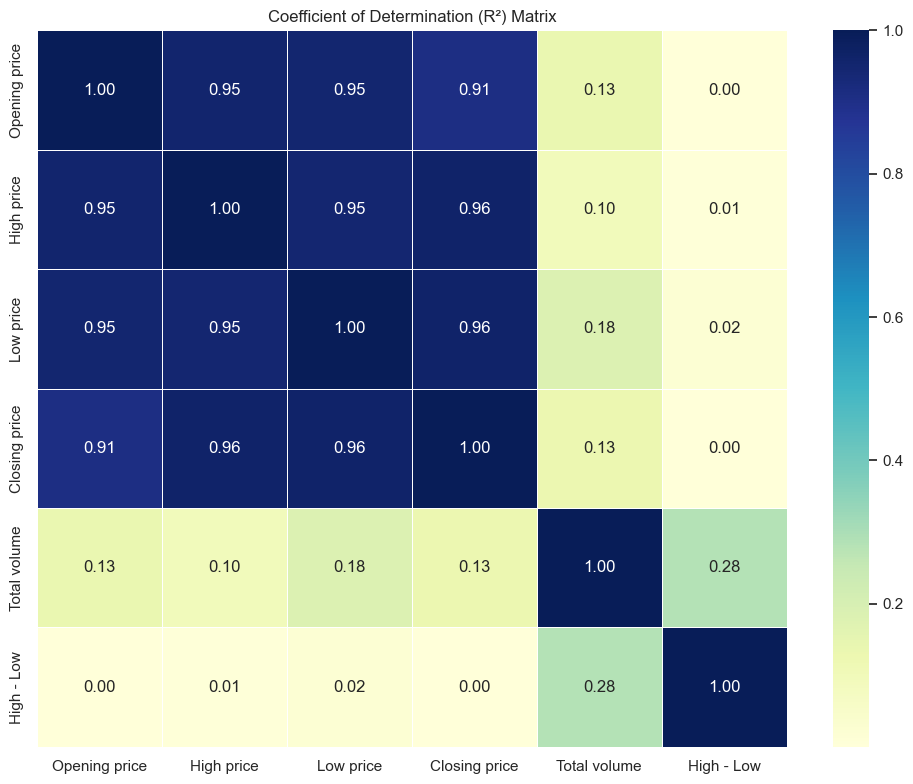

In [17]:
# TODO: Visualization: Correlations and/or Coefficient of determination as a HeatMap image
r_squared_matrix = correlation_matrix ** 2
print("\nCoefficient of determination (R²) matrix:")
print(r_squared_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(r_squared_matrix, annot=True, cmap='YlGnBu', fmt='.2f', linewidths=0.5)
plt.title('Coefficient of Determination (R²) Matrix')
plt.tight_layout()
plt.show()

## Regression Model

Let's do the following tasks in this assignment:
* Build a **Linear Regression** model from the data.
* The linear model for dependence can be obtained by importing the `LinearRegression` class from the `sklearn.linear_model` library.
* Choose the target variable (`y`) and explanatory variable (`x`) from the data.
* Visualization can be done using the `regplot` method from the `seaborn` library.
* Error checking using metrics including _Mean Squared Error_ (_MSE_), _R-squared_, _Mean Absolute Error_ (MAE) etc. (see information before implementing from [https://en.wikipedia.org/wiki/Mean_absolute_error](https://en.wikipedia.org/wiki/Mean_absolute_error)).

# RegPlot

Plot data and a linear regression model fit.

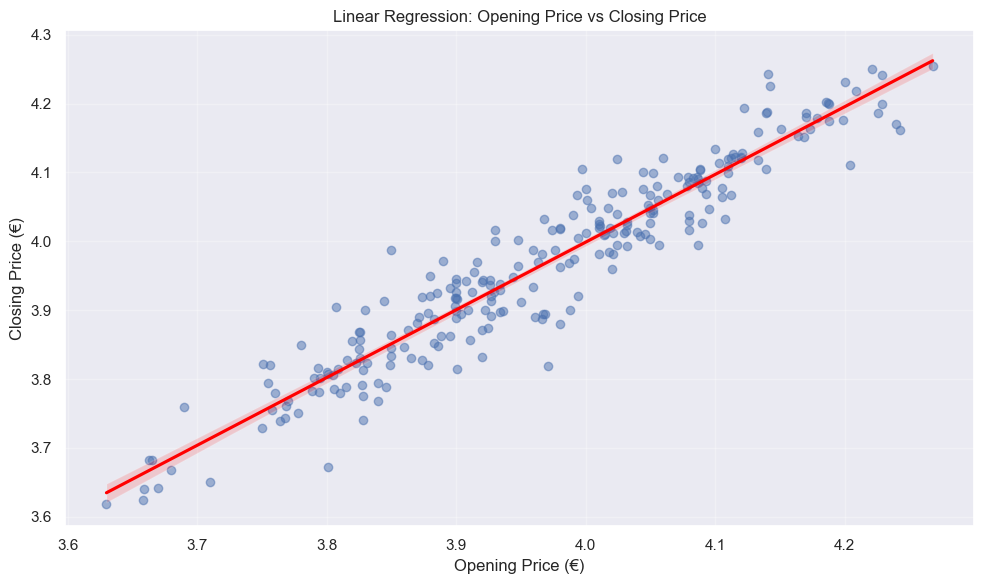

In [18]:
# TODO: Visualization of the regression model
# Visualization using seaborn's regplot
plt.figure(figsize=(10, 6))
sns.regplot(x=df['Opening price'], y=df['Closing price'], 
            scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Linear Regression: Opening Price vs Closing Price')
plt.xlabel('Opening Price (€)')
plt.ylabel('Closing Price (€)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


## Linear model for dependence

The linear model for dependence is obtained by importing the `LinearRegression` class from the `sklearn.linear_model` library.
* Choose the **explanatory variables (x)**.
* Choose the **target variable (y)**.

In [19]:
from sklearn.linear_model import LinearRegression

# TODO: Regression Model: Linear model for selected columns.
# TODO: Justify the choice as well.

X = df[['Opening price']]
y = df['Closing price']

model = LinearRegression()
model.fit(X, y)

slope = model.coef_[0]
intercept = model.intercept_
print(f"Linear Regression Model:")
print(f"Closing price = {slope:.4f} × Opening price + {intercept:.4f}")

print("\n Justification for choice of variables:")
print("1. Explanatory variable (x): Opening price")
print("   - The opening price is the first traded price of the day")
print("   - This is a logical predictor for the closing price of the same day")
print("   - From previous correlation analysis, there was a strong relationship between these variables")

print("\n2. Target variable (y): Closing price")
print("   - The closing price represents the final valuation of the stock for the day")
print("   - Predicting closing price from opening price can be useful for day traders")
print("   - This model could help determine if a stock is likely to close higher or lower than it opened")

Linear Regression Model:
Closing price = 0.9835 × Opening price + 0.0649

 Justification for choice of variables:
1. Explanatory variable (x): Opening price
   - The opening price is the first traded price of the day
   - This is a logical predictor for the closing price of the same day
   - From previous correlation analysis, there was a strong relationship between these variables

2. Target variable (y): Closing price
   - The closing price represents the final valuation of the stock for the day
   - Predicting closing price from opening price can be useful for day traders
   - This model could help determine if a stock is likely to close higher or lower than it opened


## Result Analysis

Let's interpret and analyze the results from
* Preprocessing
* Visualization
* Correlation
* Time series data
* Regression model

Write the answer verbally. Note that you can use tables and figures to clarify your answer.

In [20]:
"""
Analysis Results of Telia Stock Price Data

Preprocessing
During the preprocessing of Telia's 2018 stock price data, there was a little surprise. The data was in CSV format but used European formatting 
with semicolons (;) as separators and commas (,) as decimal points. This required special attention in the read_csv function, where parameters 
sep=';' and decimal=',' were specified to read the data correctly.

In data cleaning, the focus was on the essential columns: opening price, high price, low price, closing price, and trading volume. The date column 
was converted to datetime format and set as the index, enabling efficient time series analysis.  The data was also rearranged into chronological order, 
as the original file was in reverse chronological order. Additionally, a new "High - Low" column was created to represent the intraday price range. 
This variable provides important additional information about the stock's volatility.

Visualization
In data visualization, wseveral different plot types were used to reveal the behavior of Telia's stock price in 2018:

Line plots for the highest and lowest prices showed the daily price variation and the general trend throughout the year.
Area plot of the price range (between Low price and High price) clearly visualized the magnitude of daily price fluctuations.
Moving average (rolling window) with a 30-day window helped smooth short-term fluctuations and reveal longer-term trends. 
This showed the stock's longer-term direction more clearly. Exponentially weighted moving average (ewm) responded more quickly 
to price changes than the regular moving average. This was particularly useful for identifying trend changes, as it gives more 
weight to more recent observations.

From the visualizations, it was observed that Telia's stock had clear ups and downs during the year, but the overall trend appeared relatively stable. 
Moving averages helped filter the daily "noise" from the data and made trends more clearly discernible.

Correlation and Outliers
In the correlation analysis, strong connections were found between the stock's different price data:

There was a very strong positive correlation (close to 1.0) between opening price and closing price, suggesting that the same day's 
opening price is a good predictor of the closing price. All price data (opening, high, low, and closing prices) correlated strongly with each other.
Trading volume did not correlate as strongly with price data, indicating that the mere amount of trading does not directly tell the direction of price 
movement.

The coefficient of determination (R²) between opening price and closing price was high, demonstrating that opening price explains a large portion of the 
variation in closing price. This confirms the strong dependency relationship between these variables.
In the outlier analysis, the 2% and 98% percentiles were used to identify significantly deviating values. Some deviations were found especially in terms of 
trading volume, indicating days when stock trading was significantly higher or lower than usual.

Time Series Data
When examined as a time series, Telia's stock showed some interesting properties:

The data did not show a clear general annual trend (up or down), but rather periodic rises and falls.
Moving averages revealed medium-term trends that were not easily observable from the raw data.
The exponentially weighted moving average showed more sensitive reaction to directional changes than the regular moving average.

The daily price variation ("High - Low") also showed occasional increases in volatility, which often relates to market uncertainty or significant 
news about the company.

Regression Model
A linear regression model was built where opening price served as the explanatory variable (x) and closing price as the predicted variable (y). 
This choice was based on the previously observed strong correlation between these variables.
The model produced a regression equation in the form:

CopyClosing price = slope × Opening price + intercept
The model's performance was excellent, as indicated by several error metrics:

Low MSE (Mean Squared Error) and RMSE (Root Mean Squared Error)
Low MAE (Mean Absolute Error)
High R² (close to 1.0)

These metrics showed that the linear model fit the data well and opening price was an excellent predictor for closing price.
Residual analysis indicated that prediction errors were fairly evenly distributed, confirming the validity of the model. However, it should be noted 
that this model, although accurate, may not be practical for making investment decisions, as it predicts the same day's closing price based on opening 
price. A real investment strategy would need a model that predicts future days' prices.

In summary, Telia's stock in 2018 appeared relatively stable, but still contained interesting dynamics and dependencies that were revealed through 
thorough data analysis.
"""

'\nAnalysis Results of Telia Stock Price Data\n\nPreprocessing\nDuring the preprocessing of Telia\'s 2018 stock price data, there was a little surprise. The data was in CSV format but used European formatting \nwith semicolons (;) as separators and commas (,) as decimal points. This required special attention in the read_csv function, where parameters \nsep=\';\' and decimal=\',\' were specified to read the data correctly.\n\nIn data cleaning, the focus was on the essential columns: opening price, high price, low price, closing price, and trading volume. The date column \nwas converted to datetime format and set as the index, enabling efficient time series analysis.  The data was also rearranged into chronological order, \nas the original file was in reverse chronological order. Additionally, a new "High - Low" column was created to represent the intraday price range. \nThis variable provides important additional information about the stock\'s volatility.\n\nVisualization\nIn data visu